In [4]:
import numpy as np
from main import HopfieldNetwork
import matplotlib.pyplot as plt
import random

In [7]:
def plot_overlaps(overlaps, T, with_legend=True, title=None):
    plt.figure(figsize=(10, 6))
    for mu in range(P):
        plt.plot(overlaps[:, mu], label=f"m{mu+1}(t)")
    plt.xlabel("Time step t")
    plt.ylabel("Overlap mμ(t)")
    if title:
        plt.title(title)
    else:
        plt.title("Overlap between state and stored patterns over time")
    plt.xticks(range(T + 1))      # Integers only on x-axis
    plt.xlim(0, T)                # Optional: make plot tighter
    if with_legend:
        plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.grid(True)
    plt.show()


# Ex 1. Storage capacity in the standard Hopfield network

if overlap = 1, then a pattern has been retrieved

if overlap = 0, then there is no correlation between pattern and state

if overlap = -1, then all the bits are exactly opposite of the pattern (kind of like negative correlation)


## 1.1

In [19]:
P = 5
N = 300
T = 5

network = HopfieldNetwork(N,P)
#Setting inital state as the first pattern
start_state = network.patterns[0].copy()
network.set_states(start_state)

network.compute_overlap()

[1.0,
 -0.02666666666666667,
 -0.05333333333333334,
 -0.013333333333333334,
 -0.05333333333333334]

In [20]:
overlaps = np.zeros((T,P))
print("Overlap with patterns at the initial state")
print(network.overlaps)

for step in range(T):
    new_state = network.compute_next_state_fast()
    overlaps[step, :] = network.overlaps

overlaps

Overlap with patterns at the initial state
[1.0, -0.02666666666666667, -0.05333333333333334, -0.013333333333333334, -0.05333333333333334]


array([[ 1.        , -0.02666667, -0.05333333, -0.01333333, -0.05333333],
       [ 1.        , -0.02666667, -0.05333333, -0.01333333, -0.05333333],
       [ 1.        , -0.02666667, -0.05333333, -0.01333333, -0.05333333],
       [ 1.        , -0.02666667, -0.05333333, -0.01333333, -0.05333333],
       [ 1.        , -0.02666667, -0.05333333, -0.01333333, -0.05333333]])

In [ ]:
plot_overlaps(overlaps, T)

### Why does the overlap remain constant?

The overlap of the state S(t) with pattern 1 stays constant because the inital state is precisely already a retrieved pattern therefore, it is already in a stable state. So `W * S = h => sign(h) = S`, across every time step. This is the intended design of the Hopfield network - if you start at an attractor (or 'memory'), the state should not change.

## 1.2

In [22]:
P = 200
N = 300
T = 5

network = HopfieldNetwork(N,P)
#Setting inital state as the first pattern
start_state = network.patterns[0].copy()
network.set_states(start_state)

network.compute_overlap(return_none=True)

In [23]:
overlaps = np.zeros((T,P))

for step in range(T):
    new_state = network.compute_next_state_fast()
    overlaps[step, :] = network.overlaps

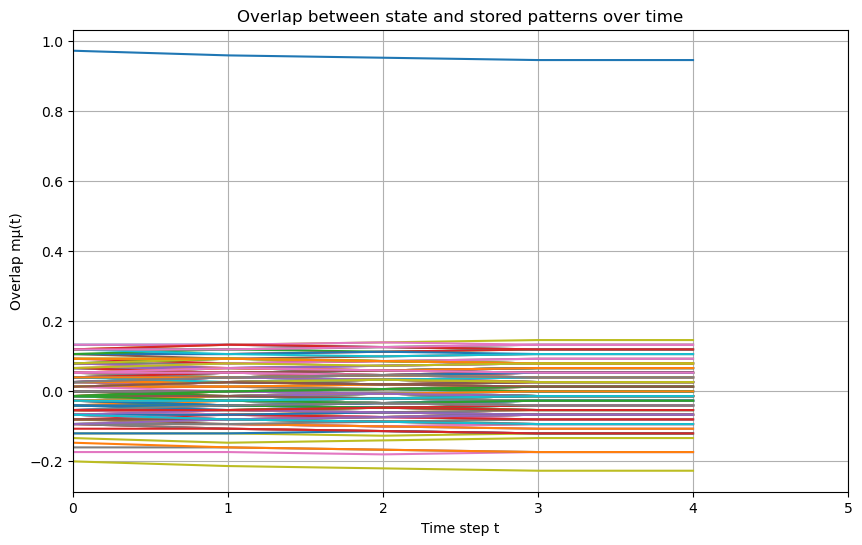

In [24]:
plot_overlaps(overlaps, T, with_legend=False)


### Why does the overlap m1(t) drop below 1? 

Because the number of patterns is approching the number of neurons, this number of patterns is too big for the memory capacity of N neurons, meaning that if the initial state is identical to a pattern it moves away. The weight matrix, which dictates the update of states at each steps, becomes noisy as there's too great an 'interference' or 'crosstalk' from other patterns. 

### What does the network converge to instead of the first pattern?

In [34]:
num_different = N - sum(np.abs(network.states + start_state) / 2)
num_different

8.0

The state drifts toward a spurious attractor, and therefore state != pattern, meaning m1(t) != 1.

In this case, the state converges to a pattern with 8 flipped bits (1s/0s). This pattern is similar enough to attract the state away from the starting pattern with the added influence of other similar patterns in the oversaturated network.

### 1.3 
Plot the overlap with all patterns over the time step t. Why does
the overlap m1(t) increase to 1 across time?

In [42]:
P = 20
N = 600
T = 30
N_flipped = 200

network = HopfieldNetwork(N,P)
# Setting inital state as the first pattern with 200 bits flipped
start_state = network.patterns[0].copy()
random_index = random.sample(range(600), N_flipped)
start_state[random_index] *= -1

network.set_states(start_state)

network.compute_overlap(return_none=True)

In [43]:
overlaps = np.zeros((T,P))

for step in range(T):
    new_state = network.compute_next_state_fast()
    overlaps[step, :] = network.overlaps

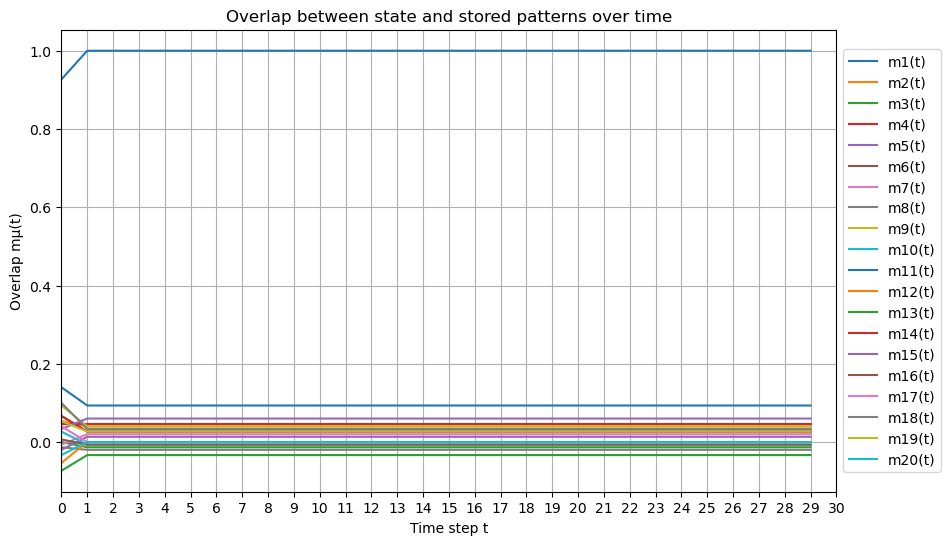

In [44]:
plot_overlaps(overlaps, T)


### Why does the overlap m1(t) increase to 1 across time?

It converges because the inital state is the most similar to that pattern, so the pattern retrieval will converge towards the most similar patterns. `m1(t) -> 1` indicates that the state converges to that pattern 'memory'.

N >> P, and so the memory capacity issue which affected the previous simulation is no more.

## 1.4 

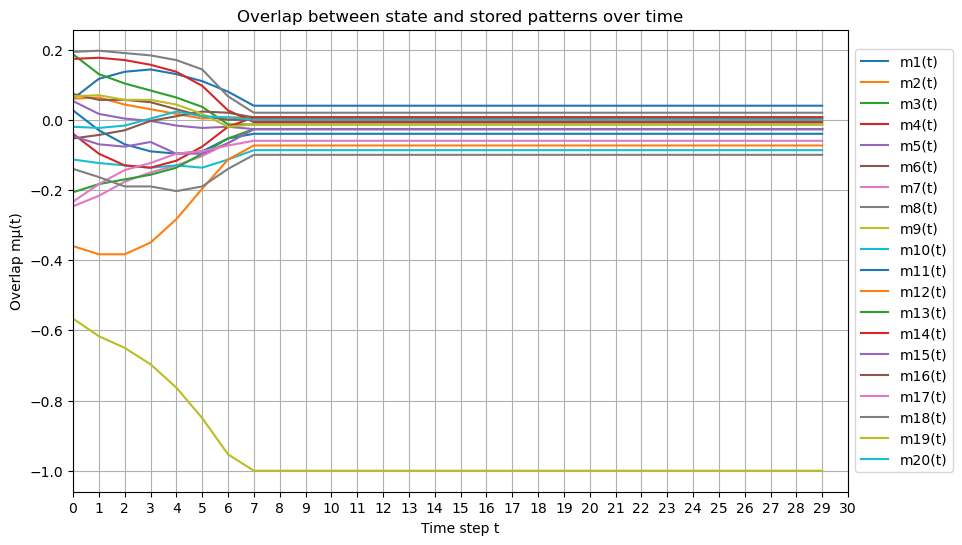

In [45]:
P = 20
N = 600
T = 30
N_flipped = 300

network = HopfieldNetwork(N,P)
# Setting inital state as the first pattern with 300 bits flipped
start_state = network.patterns[0].copy()
random_index = random.sample(range(600), N_flipped)
start_state[random_index] *= -1

network.set_states(start_state)

network.compute_overlap(return_none=True)

overlaps = np.zeros((T,P))

for step in range(T):
    new_state = network.compute_next_state_fast()
    overlaps[step, :] = network.overlaps

plot_overlaps(overlaps, T)


Flipping 300 bits puts you at the midpoint between the pattern and its inverse. The initial state is equally distant from multiple attractors or no attractor at all. As a result, the state converges to around zero for this pattern, and therefore is not able to retrieve the memory.

Coincidentally, we see the state converge to weight -1 for a given pattern - that is, the state is the inverse of that pattern. Both a given pattern p and its inverse -p are equally stable attractors, as per the Hebbian weight matrix of Hopfield networks.

Flipping *half* of the digits is therefore as far away from having the pattern as a stable attractor as possible. In this case, it leads to no convergence.

### 1.5
The size of the 'basin of attraction'

In [48]:
N = 600  # Number of neurons
T = 30   # Number of update steps
P_values = [20, 40, 60]  # Number of patterns
nflips_range = np.arange(0, 301, 30)
repeats = 5  # Repeat for averaging

In [49]:
# fractions retrieved is keyed by P, each value being a list across N_flipped
fractions_retrieved = {P: [] for P in P_values}
errors = {P: [] for P in P_values}

for P in P_values:
    for N_flipped in nflips_range:
        success_counts = []
        for _ in range(repeats):
            network = HopfieldNetwork(N, P)
            success_count = 0
            for mu in range(P):
                # repeat for all patterns
                start_state = network.patterns[mu].copy()
                flip_indices = random.sample(range(N), N_flipped)
                start_state[flip_indices] *= -1
                network.set_states(start_state)
                network.compute_overlap(return_none=True)
                
                for step in range(T):
                    network.compute_next_state_fast()
                final_state = network.states
                if np.array_equal(final_state, network.patterns[mu]):
                    success_count += 1

            # find success fractin for the N_flipped, P combination
            success_fraction = success_count / P
            success_counts.append(success_fraction)

        # average over repeats
        mean = np.mean(success_counts)
        stderr = np.std(success_counts) / np.sqrt(repeats)
        fractions_retrieved[P].append(mean)
        errors[P].append(stderr)

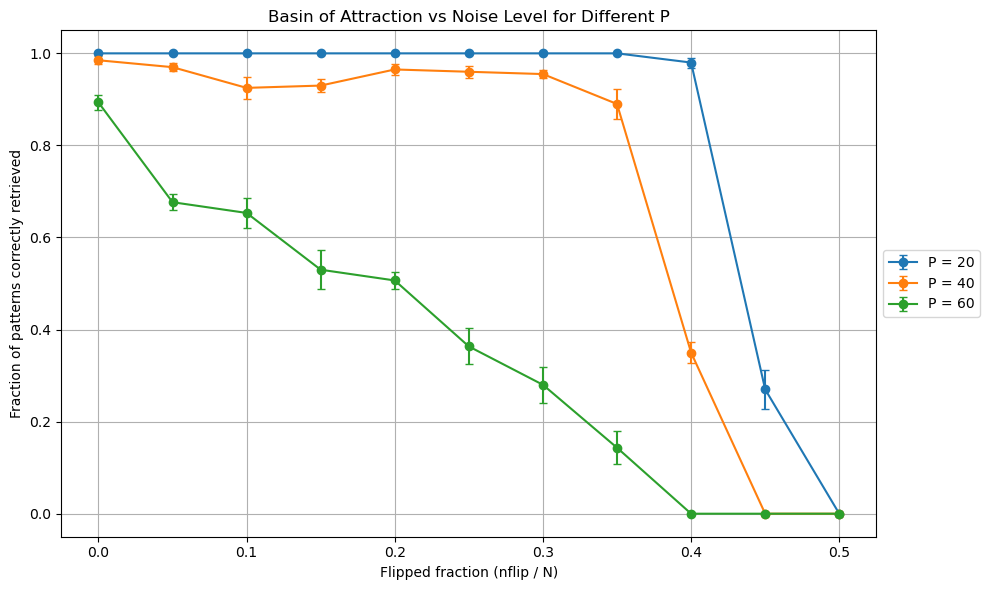

In [50]:
# Plot the results
plt.figure(figsize=(10, 6))
for P in P_values:
    plt.errorbar(nflips_range / N, fractions_retrieved[P], yerr=errors[P], label=f"P = {P}", capsize=3, marker='o')

plt.xlabel("Flipped fraction (nflip / N)")
plt.ylabel("Fraction of patterns correctly retrieved")
plt.title("Basin of Attraction vs Noise Level for Different P")
plt.grid(True)
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

## 1.6 

In [6]:
N_values = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500]
repeats = 5  # Repeat for averaging

In [8]:
max_P = {N: [] for N in N_values}
for n in N_values:
    for r in range(repeats):
        P = 0
        retrieve = True
        while retrieve:
            # increment P, 
            P += 1
            for p in range(P):
                network = HopfieldNetwork(n,P)
                network.set_states(network.patterns[p].copy())
                network.compute_overlap()
            
                new_state = network.compute_next_state_fast()
                if network.overlaps[p] != 1:
                    # overlap between pattern and state no longer 1
                    retrieve = False
        print(f"completed repeat {r}, N {n}")
        max_P[n].append(P-1)


In [24]:
max_P

{100: [11, 9, 9, 9, 10],
 200: [13, 16, 18, 18, 14],
 300: [17, 24, 24, 21, 19],
 400: [27, 27, 21, 26, 28],
 500: [30, 25, 30, 34, 31],
 600: [25, 35, 40, 28, 37],
 700: [42, 37, 42, 42, 38],
 800: [45, 52, 54, 44, 35],
 900: [52, 49, 50, 51, 45],
 1000: [51, 57, 50, 62, 54],
 1500: [61, 74, 71, 75, 72]}

In [19]:
capacity_means = {N:np.mean(fractions)/N for N,fractions in max_P.items()}
capacity_sterrs = {N:np.std([f/N for f in fractions]) for N,fractions in max_P.items()}

In [21]:
capacity_sterrs

{100: 0.008000000000000002,
 200: 0.010198039027185565,
 300: 0.009189365834726815,
 400: 0.006204836822995431,
 500: 0.0057965506984757765,
 600: 0.00936897954837013,
 700: 0.003181579635902868,
 800: 0.008403868156985808,
 900: 0.0026851213274654583,
 1000: 0.004354308211415449,
 1500: 0.003335998934185816}

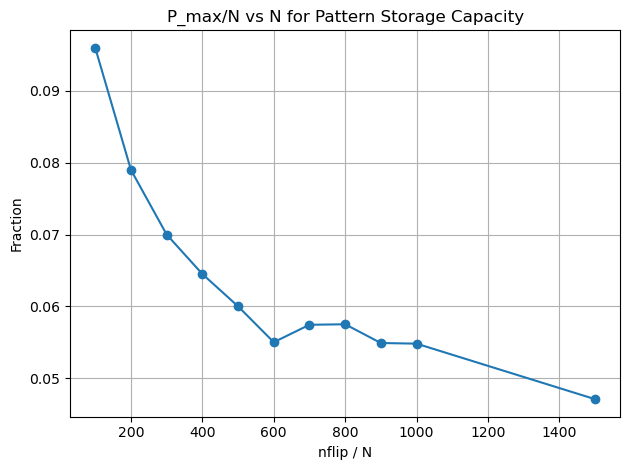

In [23]:
#plot alpha against N

# Plot
plt.figure()
plt.plot(capacity_means.keys(), capacity_means.values(), marker='o')
plt.title(f'P_max/N vs N for Pattern Storage Capacity')
plt.xlabel('N')
plt.ylabel('P_max/N')
plt.grid(True)
plt.tight_layout()
plt.show()

### 1.7 (Bonus)

Are we meant to code this? All it really is is the same code with greater N values, right?

In [ ]:
N_values = [5000, 10_000, 50_000]
repeats = 3
max_alpha = 0.25  # upper bound for search

max_P = {N: [] for N in N_values}
for n in N_values:
    for r in range(repeats):
        P = 0
        retrieve = True
        while retrieve:
            # increment P, 
            P += 1
            for p in range(P):
                network = HopfieldNetwork(n,P)
                network.set_states(network.patterns[p].copy())
                network.compute_overlap()
            
                new_state = network.compute_next_state_fast()
                if network.overlaps[p] != 1:
                    # overlap between pattern and state no longer 1
                    retrieve = False
        print(f"completed repeat {r}, N {n}")
        max_P[n].append(p-1)


# Part 2

### 2.1

See main.py for implementation

In [3]:
N = 100
P = 5
K = N/2

network = HopfieldNetwork(N,P,K)

### 2.2

In [4]:
N_values = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500]
repeats = 5  # Repeat for averaging

max_P_ex2 = {N: [] for N in N_values}
for n in N_values:
    for r in range(repeats):
        P = 0
        retrieve = True
        while retrieve:
            # increment P, 
            P += 1
            for p in range(P):
                network = HopfieldNetwork(n,P,P/2)
                network.set_states(network.patterns[p].copy())
                network.compute_overlap()
            
                new_state = network.compute_next_state_fast()
                if network.overlaps[p] != 1:
                    # overlap between pattern and state no longer 1
                    retrieve = False
        print(f"completed repeat {r}, N {n}")
        max_P_ex2[n].append(p-1)


completed repeat 0, N 100
completed repeat 1, N 100
completed repeat 2, N 100
completed repeat 3, N 100
completed repeat 4, N 100
completed repeat 0, N 200
completed repeat 1, N 200
completed repeat 2, N 200
completed repeat 3, N 200
completed repeat 4, N 200
completed repeat 0, N 300
completed repeat 1, N 300
completed repeat 2, N 300
completed repeat 3, N 300
completed repeat 4, N 300
completed repeat 0, N 400
completed repeat 1, N 400
completed repeat 2, N 400
completed repeat 3, N 400
completed repeat 4, N 400
completed repeat 0, N 500
completed repeat 1, N 500
completed repeat 2, N 500
completed repeat 3, N 500
completed repeat 4, N 500
completed repeat 0, N 600
completed repeat 1, N 600
completed repeat 2, N 600
completed repeat 3, N 600
completed repeat 4, N 600
completed repeat 0, N 700
completed repeat 1, N 700
completed repeat 2, N 700
completed repeat 3, N 700
completed repeat 4, N 700
completed repeat 0, N 800
completed repeat 1, N 800
completed repeat 2, N 800
completed re

In [5]:
max_P_ex2

{100: [7, 13, 11, 10, 11],
 200: [20, 17, 16, 18, 16],
 300: [19, 25, 22, 19, 23],
 400: [24, 21, 30, 25, 24],
 500: [37, 27, 31, 35, 33],
 600: [22, 41, 37, 39, 31],
 700: [40, 38, 31, 45, 43],
 800: [50, 38, 41, 44, 42],
 900: [40, 54, 51, 52, 47],
 1000: [57, 50, 53, 49, 49],
 1500: [79, 66, 65, 59, 71]}

In [6]:
capacity_means = {N:np.mean(fractions)/N for N,fractions in max_P_ex2.items()}
capacity_sterrs = {N:np.std([f/N for f in fractions]) for N,fractions in max_P_ex2.items()}

capacity_sterrs

{100: 0.019595917942265423,
 200: 0.007483314773547884,
 300: 0.0077746025264603955,
 400: 0.007314369419163896,
 500: 0.006881860213634102,
 600: 0.011450376024878445,
 700: 0.006916410535377259,
 800: 0.005,
 900: 0.005506449641495051,
 1000: 0.003072458299147443,
 1500: 0.004462186808181737}

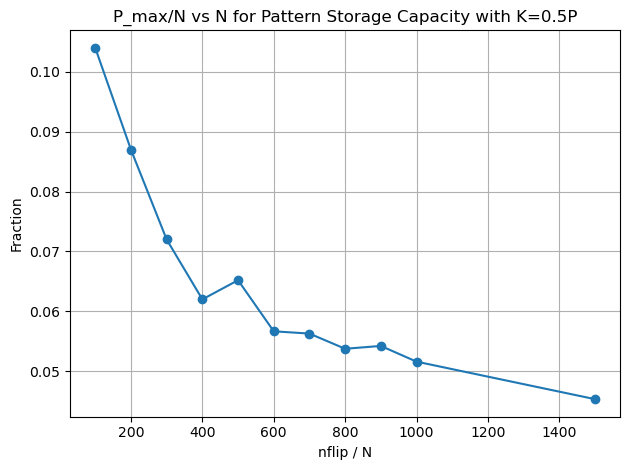

In [7]:
#plot alpha against N

# Plot
plt.figure()
plt.plot(capacity_means.keys(), capacity_means.values(), marker='o')
plt.title(f'P_max/N vs N for Pattern Storage Capacity with K=0.5P')
plt.xlabel('nflip / N')
plt.ylabel('Fraction')
plt.grid(True)
plt.tight_layout()
plt.show()

### 2.3

In [8]:
N = 600  # Number of neurons
T = 30   # Number of update steps
P_values = [15, 20]  # Number of patterns
nflips_range = np.arange(0, 301, 30)
repeats = 5  # Repeat for averaging

In [9]:
# fractions retrieved is keyed by P, each value being a list across N_flipped
fractions_retrieved = {P: [] for P in P_values}
errors = {P: [] for P in P_values}

for P in P_values:
    for N_flipped in nflips_range:
        success_counts = []
        for _ in range(repeats):
            network = HopfieldNetwork(N, P, int(P/2))
            success_count = 0
            for mu in range(P):
                # repeat for all patterns
                start_state = network.patterns[mu].copy()
                flip_indices = random.sample(range(N), N_flipped)
                start_state[flip_indices] *= -1
                network.set_states(start_state)
                network.compute_overlap(return_none=True)
                
                for step in range(T):
                    network.compute_next_state_fast()
                final_state = network.states
                if np.array_equal(final_state, network.patterns[mu]):
                    success_count += 1

            # find success fractin for the N_flipped, P combination
            success_fraction = success_count / P
            success_counts.append(success_fraction)

        # average over repeats
        mean = np.mean(success_counts)
        stderr = np.std(success_counts) / np.sqrt(repeats)
        fractions_retrieved[P].append(mean)
        errors[P].append(stderr)

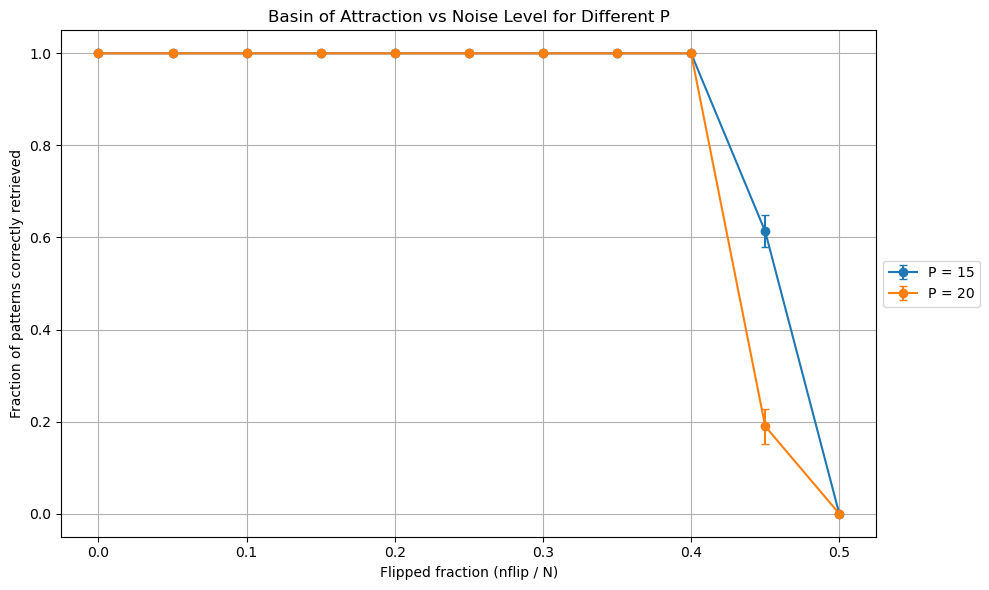

In [10]:
plt.figure(figsize=(10, 6))
for P in P_values:
    plt.errorbar(nflips_range / N, fractions_retrieved[P], yerr=errors[P], label=f"P = {P}", capsize=3, marker='o')

plt.xlabel("Flipped fraction (nflip / N)")
plt.ylabel("Fraction of patterns correctly retrieved")
plt.title("Basin of Attraction vs Noise Level for Different P")
plt.grid(True)
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

Fully connected networks suffer from interference between patterns as P increases — this is the main limiting factor of memory capacity. Diluting the network (removing some connections) reduces interference, especially with smaller P. In these results, like before, we see decreasing fraction of patterns returned with a larger flipped fraction.

# Exercise 3

In [8]:
N = 1000  # Number of neurons
T = 50   # Number of update steps
P = 5  # Number of patterns
betas = (1.5, 2.5, 3.5)

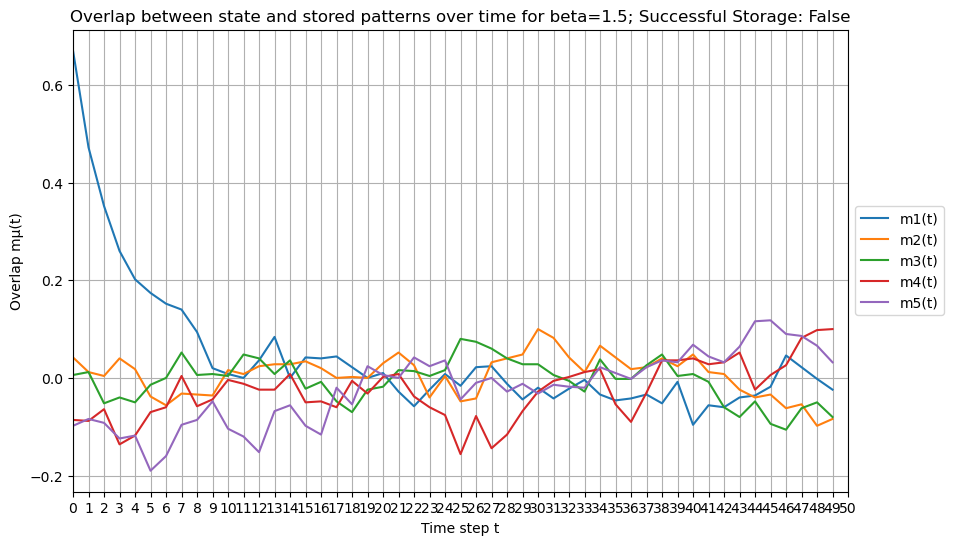

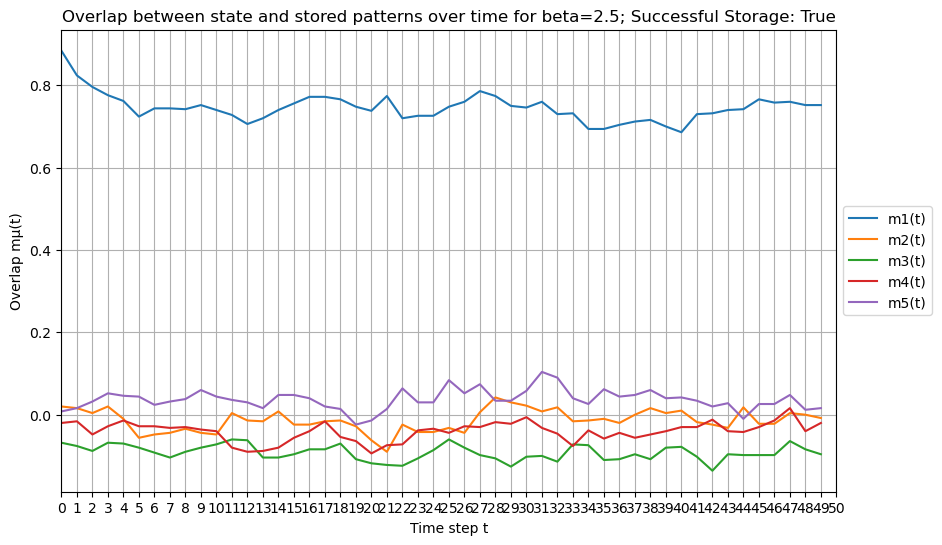

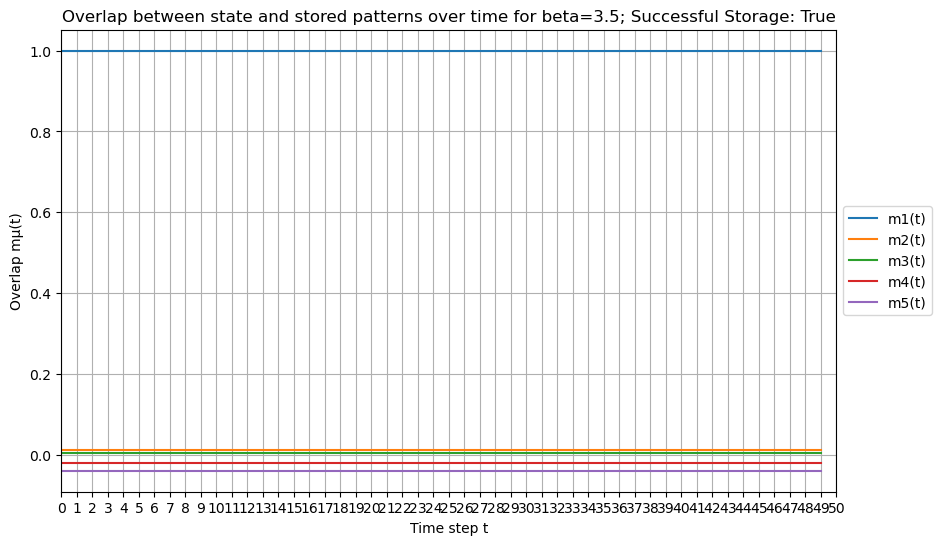

In [18]:
for beta in betas:
    network = HopfieldNetwork(N,P)
    #Setting inital state as the first pattern
    start_state = network.patterns[0].copy()
    network.set_states(start_state)

    network.compute_overlap()

    overlaps = np.zeros((T,P))

    for step in range(T):
        new_state = network.compute_next_state_ex3(beta)
        overlaps[step, :] = network.overlaps

    is_stored = not np.argmax(np.mean(overlaps[-10:,:], axis=0))
    plot_overlaps(overlaps, T, title=f"Overlap between state and stored patterns over time for beta={beta}; Successful Storage: {is_stored}")


As beta increases, the arctan function begins to resemble the step function more. Or in other words, the sign() function which we used in exercises 1 and 2. In this instance, the probability is more likely skewed towards the extremes of 0 or 1, and so the overlap vs time per pattern will more closely resemble Exercise 1.1.

Like in 1.1, The overlap of the state S(t) with pattern 1 stays constant because the inital state is precisely already a retrieved pattern therefore, it is already in a stable state. So `W * S = h => sign(h) = S`, across every time step. This is not true for beta 1.5 and 2.5; the stochastic nature of the firing results in a more random, quasi-Brownian motion. As a result, the model with beta = 1.5 does not properly store the patterns

### Ex3.2

In [20]:
repeats = 5  # Repeat for averaging

N = 1000  # Number of neurons
T = 50   # Number of update steps
P = 5  # Number of patterns
betas = (1, 1.5, 2, 2.5, 3, 3.5)

In [21]:
def check_within_capacity(overlaps, p):
    """
    As per definition in Note 2, a pattern is stored properly if the average of the last 10 overlaps is at maximum for the first pattern
    """
    
    # if the argmax == p, then the pattern is stored properly
    return not np.argmax(np.mean(overlaps[-10:,:], axis=0)) - p

In [ ]:
# NEED TO RUN THIS OVER TIME, UNLIKE 1.6

max_P = {beta: [] for beta in betas}
for r in range(repeats):
    P = 0
    retrieve = True
    while retrieve:
        # increment P, 
        P += 1
        for p in range(P):
            network = HopfieldNetwork(N,P)
            network.set_states(network.patterns[p].copy())
            network.compute_overlap()
        
            new_state = network.compute_next_state_ex3(beta)
            if network.overlaps[p] != 1:
                # overlap between pattern and state no longer 1
                retrieve = False
    print(f"completed repeat {r}, Beta {beta}")
    max_P[beta].append(P-1)
